## Importing libraries

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os

## Reading dataset

In [2]:
data=pd.read_csv("amazon_prime_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## Basic information

In [3]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
#dropping dupliactes in movie id
data.drop_duplicates(subset="show_id",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 981.9+ KB


In [6]:
#checking for nullvalues
data.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#converting data_added to datetime
data["date_added"] = pd.to_datetime(data["date_added"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 981.9+ KB


In [8]:
#dding more columns,of year,month and datetime
data["day_added"] = data["date_added"].dt.day_name()
data["month_added"] = data["date_added"].dt.month_name()
data["year_added"] = data["date_added"].dt.year

In [9]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Tuesday,March,2021.0
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Tuesday,March,2021.0
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Tuesday,March,2021.0
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Tuesday,March,2021.0
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Tuesday,March,2021.0


In [10]:
#types of movies
data["type"].nunique()

2

In [11]:
#number of countries and their appearence
data["country"].str.split(",",expand=True).stack().value_counts()

United States     292
India             238
United Kingdom     48
 United States     42
Canada             25
                 ... 
Ireland             1
 Luxembourg         1
South Africa        1
 Monaco             1
 Hong Kong          1
Length: 65, dtype: int64

In [12]:
#type of movies and their appearancs
data["type"].str.split(",",expand =True).stack().value_counts()

Movie      7814
TV Show    1854
dtype: int64

In [13]:
#showing rating and number of appearence
data["rating"].str.split(",",expand=True).stack().value_counts()

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
dtype: int64

In [14]:
#showing listed in and  number of occurence
data["listed_in"].str.split(",",expand=True).stack().value_counts()

Drama                         2216
Action                        1657
Comedy                        1475
 Drama                        1471
 Suspense                     1307
Documentary                    913
 Special Interest              792
 Kids                          712
 Comedy                        624
 Romance                       548
Horror                         535
Animation                      498
 Entertainment                 483
 and Culture                   483
Arts                           457
Kids                           373
 Science Fiction               372
 Horror                        340
 International                 308
TV Shows                       263
Suspense                       194
 Adventure                     188
Special Interest               188
 Sports                        141
Arthouse                       132
 Western                       132
Romance                        126
 Unscripted                    123
Music Videos and Con

In [15]:
#converting year added to object datatype
data["year_added"] = pd.to_numeric(data["year_added"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9667
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
 12  day_added     155 non-null    object        
 13  month_added   155 non-null    object        
 14  year_added    155 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int6

## Statistics

In [16]:
data.describe(exclude="number").T

C:\Users\PC\AppData\Local\Temp\ipykernel_14248\1712932313.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude="number").T


,count,unique,top,freq,first,last
show_id,9668,9668,s1,1,NaT,NaT
type,9668,2,Movie,7814,NaT,NaT
title,9668,9668,The Grand Seduction,1,NaT,NaT
director,7586,5774,Mark Knight,113,NaT,NaT
cast,8435,7927,Maggie Binkley,56,NaT,NaT
country,672,86,United States,253,NaT,NaT
date_added,155,84,2021-03-30 00:00:00,14,2021-03-30,2021-10-10
rating,9331,24,13+,2117,NaT,NaT
duration,9668,219,1 Season,1342,NaT,NaT
listed_in,9668,518,Drama,986,NaT,NaT


In [17]:
types = data.groupby(["type"])["type"].count().reset_index(name="count")
types = types.set_index("type")
types

,count
type,
Movie,7814
TV Show,1854


In [18]:
show_directors = data.groupby(["director","type"])["type"].count().reset_index(name="count")
show_directors = show_directors.set_index("director")
show_directors

,type,count
director,,
1,Movie,16
20th Century Fox,Movie,1
20th_century_fox,Movie,2
9 Story Entertainment,Movie,1
A Gokul Krishna,Movie,1
...,...,...
Ángel González,Movie,1
Émile Gaudreault,Movie,1
Étienne Chatiliez,Movie,1


In [19]:
top10_directors = show_directors.query("`count`>13")
top10_directors = top10_directors.sort_values("count",ascending=False)
top10_directors

,type,count
director,,
Mark Knight,Movie,113
Cannis Holder,Movie,61
Moonbug Entertainment,Movie,37
Jay Chapman,Movie,34
Arthur van Merwijk,Movie,30
Manny Rodriguez,Movie,22
John English,Movie,20
1,Movie,16
Brian Volk-Weiss,Movie,15


In [20]:
show_country = data.groupby(["country","type"])["type"].count().reset_index(name="count")
show_country = show_country.set_index("country")
show_country

,type,count
country,,
"Afghanistan, France",Movie,1
Australia,Movie,4
"Australia, Colombia, United Kingdom",Movie,1
"Australia, United States, Germany",Movie,1
Austria,Movie,1
...,...,...
"United States, United Arab Emirates",Movie,1
"United States, United Kingdom",Movie,6
"United States, United Kingdom, Canada",TV Show,1


In [21]:
#countries with more than 5 apperences
top_country = show_country.query("`count`>5")
top_country 

,type,count
country,,
Canada,Movie,16
India,Movie,213
India,TV Show,16
Italy,Movie,6
United Kingdom,Movie,24
"United Kingdom, United States",Movie,9
United States,Movie,194
United States,TV Show,59
"United States, United Kingdom",Movie,6


In [22]:
show_rating = data.groupby(["rating","type"])["rating"].count().reset_index(name="count")
show_rating = show_rating.set_index("rating")
show_rating = show_rating.sort_values("count",ascending=False)
show_rating

,type,count
rating,,
13+,Movie,1849
16+,Movie,1272
18+,Movie,1097
R,Movie,1010
ALL,Movie,988
PG-13,Movie,393
7+,Movie,288
ALL,TV Show,280
16+,TV Show,275


In [23]:
release_day = data.groupby(["day_added","type","rating"])["rating"].count().reset_index(name="count")
release_day = release_day.set_index("day_added")
release_day = release_day.sort_values("count",ascending=False)
release_day

,type,rating,count
day_added,,,
Sunday,TV Show,ALL,8
Tuesday,TV Show,ALL,7
Saturday,TV Show,TV-G,7
Saturday,TV Show,ALL,6
Friday,TV Show,7+,5
...,...,...,...
Thursday,TV Show,NR,1
Thursday,TV Show,TV-G,1
Thursday,TV Show,TV-MA,1


In [24]:
release_month = data.groupby(["month_added","type","rating"])["type"].count().reset_index(name="count")
release_month = release_month.set_index("month_added")
release_month = release_month.sort_values("count",ascending=False)
release_month

,type,rating,count
month_added,,,
September,TV Show,ALL,11
October,TV Show,ALL,5
June,TV Show,16+,5
May,TV Show,ALL,5
September,TV Show,TV-Y,4
...,...,...,...
March,TV Show,TV-G,1
March,TV Show,ALL,1
March,Movie,13+,1


## Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

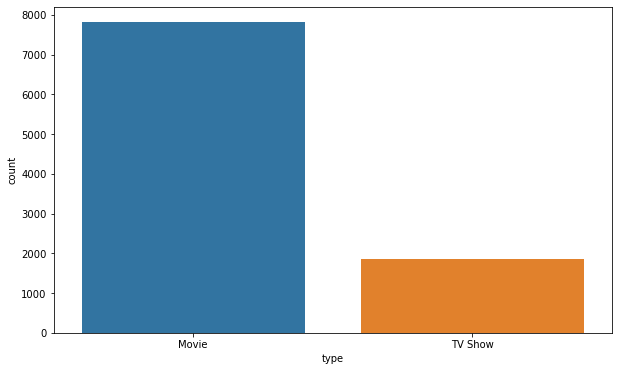

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x= data["type"])

Movies accounted for upto 90%of the total listed,while TV shows were about 10%

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '13+'),
  Text(1, 0, 'ALL'),
  Text(2, 0, '18+'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-Y'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'NR'),
  Text(7, 0, '16+'),
  Text(8, 0, 'TV-PG'),
  Text(9, 0, '7+'),
  Text(10, 0, 'TV-14'),
  Text(11, 0, 'TV-NR'),
  Text(12, 0, 'TV-G'),
  Text(13, 0, 'PG-13'),
  Text(14, 0, 'TV-MA'),
  Text(15, 0, 'G'),
  Text(16, 0, 'PG'),
  Text(17, 0, 'NC-17'),
  Text(18, 0, 'UNRATED'),
  Text(19, 0, '16'),
  Text(20, 0, 'AGES_16_'),
  Text(21, 0, 'AGES_18_'),
  Text(22, 0, 'ALL_AGES'),
  Text(23, 0, 'NOT_RATE')])

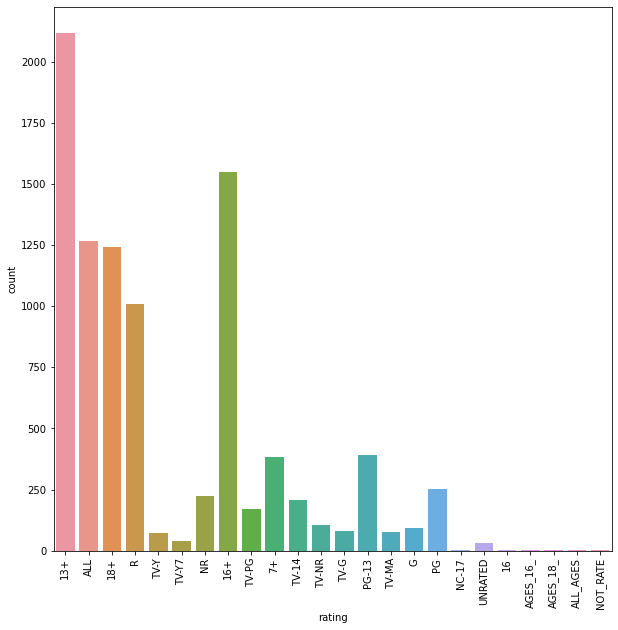

In [26]:
plt.figure(figsize =(10,10))
sns.countplot(x= data["rating"])
plt.xticks(rotation=90)

Top movie rating were 13+,16+,and ALL while Ages-16,18,and not rated were the least

<AxesSubplot:xlabel='day_added', ylabel='count'>

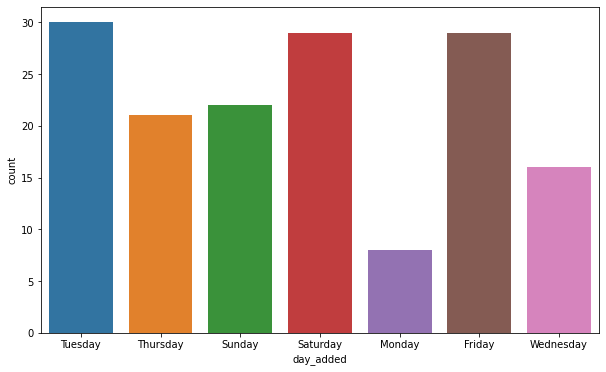

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x=data["day_added"])

Alot of the movies,were added on Tuesday, followed by saturday and friday while few movies were added on Monday

<AxesSubplot:xlabel='month_added', ylabel='count'>

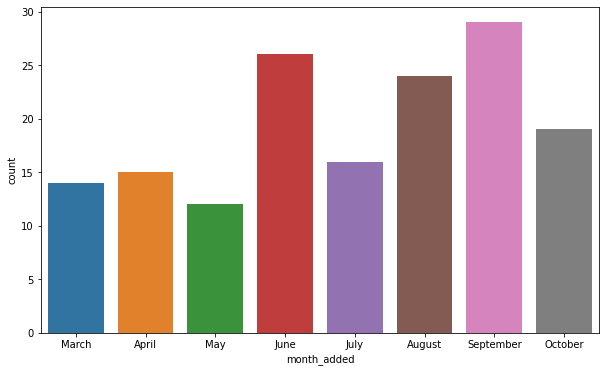

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x=data["month_added"])

Most movies were added on september,followed by June and August while may had the least movies added

Text(0.5, 1.0, 'type_of_show')

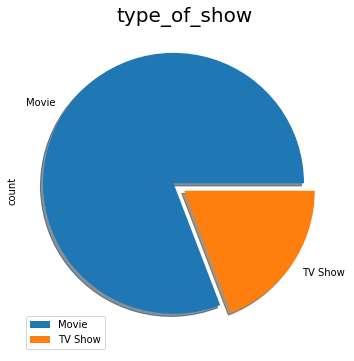

In [29]:
myexplode = [0.1, 0.0]
types.plot.pie(y="count", shadow=True, legend="type", figsize=(6, 6),explode=myexplode)
plt.title("type_of_show", fontsize=20)

Text(0.5, 1.0, 'Top10 directors')

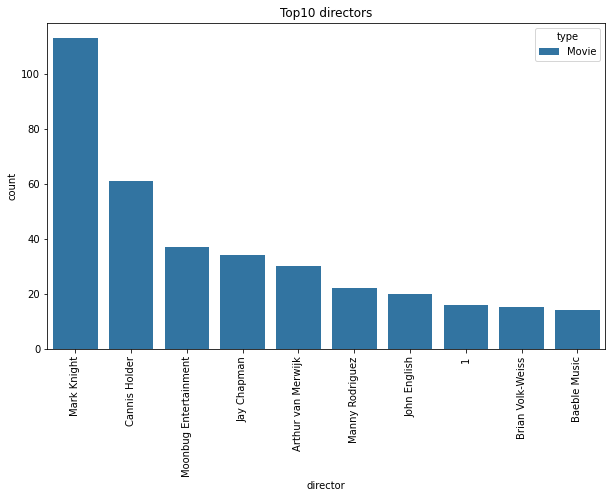

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(x=top10_directors.reset_index()["director"],y=top10_directors.reset_index()["count"],hue=top10_directors.reset_index()["type"])
plt.xticks(rotation=90)
plt.title("Top10 directors",fontsize=12)

director mark-knight had the highest production while baeble music had the lease productions in top 10 directors

Text(0.5, 1.0, 'Top countries')

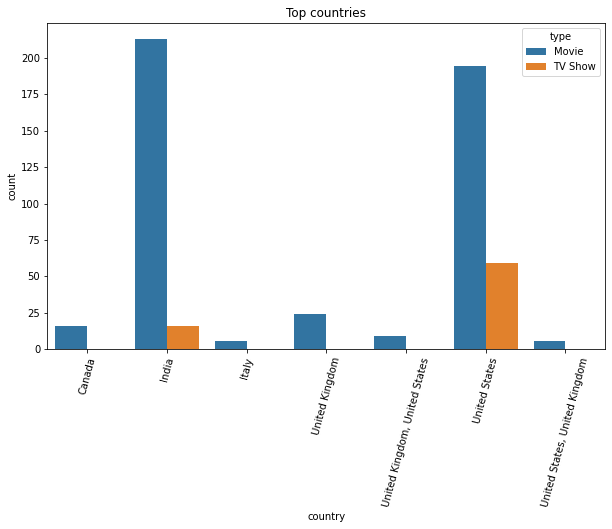

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_country.reset_index()["country"],y=top_country.reset_index()["count"],hue=top_country.reset_index()["type"])
plt.xticks(rotation=75)
plt.title("Top countries",fontsize=12)

India had thehighest production of movies, followed by the united states that had  themost TV showproductions in the top10 counries

Text(0.5, 1.0, 'Ratings')

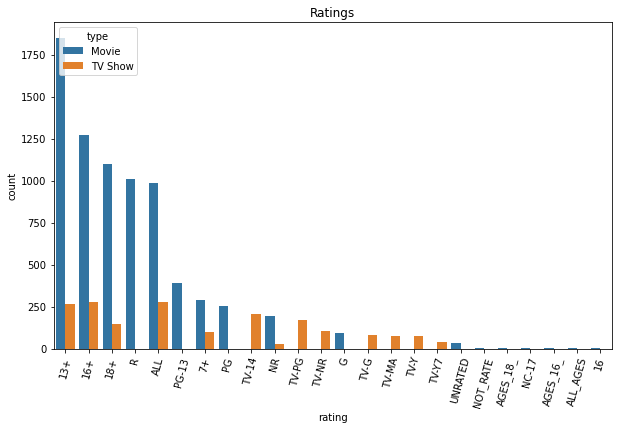

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=show_rating.reset_index()["rating"],y=show_rating.reset_index()["count"],hue=show_rating.reset_index()["type"])
plt.xticks(rotation=75)
plt.title("Ratings")

Most movies are rated 13+,16+ and 18+ respectively while Tv shows were rated 13+

Text(0.5, 1.0, 'overall_ratings distribution')

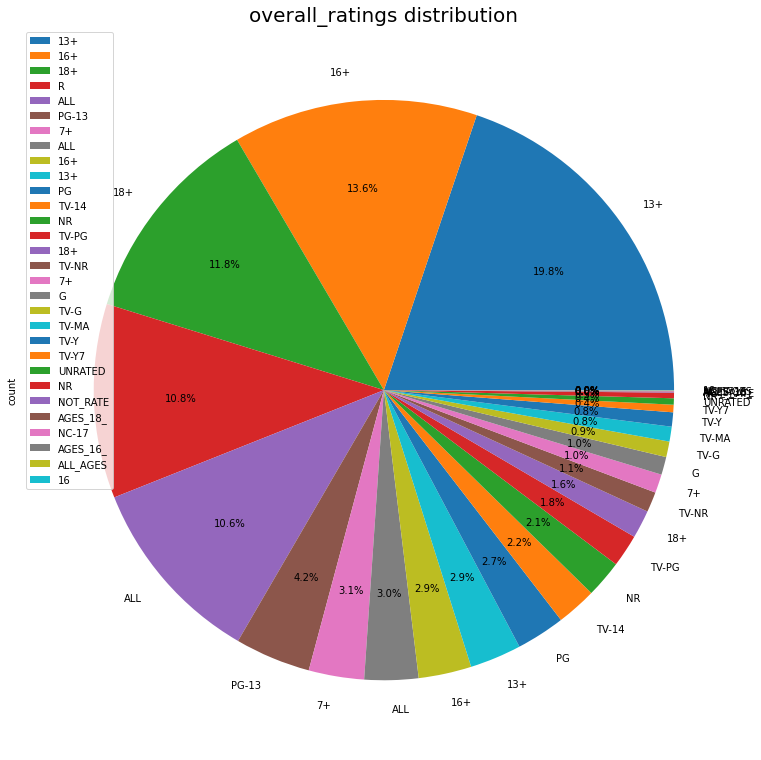

In [33]:

show_rating.plot.pie(y='count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.7)
plt.title('overall_ratings distribution', fontsize=20)
